In [1]:
#!/usr/bin/env python
# coding: utf-8
__docformat__ = 'reStructuredText'
###########################################
# Imports
###########################################
import sys #to put the SCM into the PYTHONPATH
sys.path.append('../../library/scm/')

from sys import exit
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import scipy.signal
from scipy.interpolate import interp1d
import xarray as xr
import time as TIME

# plt.rcParams['text.usetex'] = False
# plt.rcParams.update({'font.size': 22})
# plt.rcParams.update({'figure.facecolor': 'white'})
# plt.rcParams.update({'savefig.facecolor': 'white'})
# plt.rcParams.update({'lines.linewidth': 3.0})
#plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']


plt.rcParams['text.usetex'] = True
# plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.facecolor':'white'})
plt.rcParams.update({'savefig.facecolor':'white'})
###########################################



In [2]:

#===========================================================================
#case = 'FC500'
case = 'WANG1_FR'


saving_path = '../../figures/SCM_LES_comparison/'
saving_name = case+'72h_profile_LES_vs_EDMF.png'

models = ['CROCO','MNH'] 

In [19]:
###############################
les = {}
LG_MEAN={}
LG_RES={}
LG_SBG={}
BU_KE={}
TH_les={}
U_les={}
V_les={}
U_avg={}
V_avg={}
WTH={}
WU={}
WV={}
TKE={}
WTKE={}
z_r = {}

# Opening MNH
print('Opening MNH')
model = 'MNH'
file = 'GN_01.1.OC_01.000.nc'
path = '../../tests/data/'+case+'/'
les[model] = xr.open_dataset(path+file)
LG_MEAN[model]= xr.open_dataset(path+file,group ='/LES_budgets/Mean/Cartesian/Not_time_averaged/Not_normalized/cart')
LG_RES[model] = xr.open_dataset(path+file,group ='/LES_budgets/Resolved/Cartesian/Not_time_averaged/Not_normalized/cart')    
LG_SBG[model] = xr.open_dataset(path+file,group ='/LES_budgets/Subgrid/Cartesian/Not_time_averaged/Not_normalized/cart')
BU_KE [model] = xr.open_dataset(path+file,group ='/LES_budgets/BU_KE/Cartesian/Not_time_averaged/Not_normalized/cart')
TH_les[model] = (LG_MEAN[model].MEAN_TH - 273.15)
U_les [model] = (LG_MEAN[model].MEAN_U)
V_les [model] = (LG_MEAN[model].MEAN_V)
U_avg [model] = U_les[model].mean(dim='time_les')
V_avg [model] = V_les[model].mean(dim='time_les')
WTH   [model] = (LG_RES[model].RES_WTH + LG_SBG[model].SBG_WTHL)
WU    [model] = (LG_RES[model].RES_WU  + LG_SBG[model].SBG_WU)
WV    [model] = (LG_RES[model].RES_WV  + LG_SBG[model].SBG_WV)
TKE   [model] = (LG_RES[model].RES_KE  + LG_SBG[model].SBG_TKE) 
WTKE  [model] = (LG_RES[model].RES_WKE + LG_SBG[model].SBG_WTKE)
z_r[model] = (les[model].level_les - (les[model].level_les[0] + les[model].level_les[-1])).data


# Opening CROCO
print('Opening CROCO')
model='CROCO'
file = 'croco_wang1_diags_full.nc'
path = '../data/'+case+'/'
les[model] = xr.open_dataset(path+file)
TH_les[model] = les['CROCO']['mean_theta']
U_les [model] = les['CROCO']['mean_u']   
V_les [model] = les['CROCO']['mean_v']
U_avg [model] = U_les[model].mean(dim='time')
V_avg [model] = V_les[model].mean(dim='time')
WTH   [model] = les['CROCO']['res_wt']+les['CROCO']['sbg_wt']
WU    [model] = les['CROCO']['res_wu']+les['CROCO']['sbg_wu']
WV    [model] = les['CROCO']['res_wv']+les['CROCO']['sbg_wv']
TKE   [model] = les['CROCO']['res_tke']+les['CROCO']['sbg_tke']
WTKE  [model] = les['CROCO']['res_wtke']+les['CROCO']['sbg_wtke']
z_r[model] = les[model]['z_r']


Opening MNH
Opening CROCO


In [33]:

instant=91
mld=3000
def plot_instant_panel(instant=instant):

    instant_model = {'CROCO': instant+1,'MNH': instant} # CROCO starts at t=0, MNH at t=1h...

    colors = {'CROCO': 'tab:blue', 'MNH': 'tab:orange'}
    #============================================ WC ===============================================
    fig, axes = plt.subplots(nrows=3, ncols=3, sharex=False,
                            sharey=True, constrained_layout=True)

    ax_index=-1

    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_xlabel(r'$^{\circ}{\rm C}$')
    ax.set_ylabel(r'$z / h $')
    ax.set_title(r'$\overline{\theta}$')
    ax.set_xlim(2.989,3)

    for model in models:
        ax.plot(TH_les[model][instant_model[model]], z_r[model]/mld, color=colors[model],label=model)



    # ===============================================================

    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{u}$')

    ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')


    for model in models:
        ax.plot(U_les[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    #ax.set_ylim((-1.3, 0))

    # ===============================================================

    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{v}$')

    ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')

    for model in models:
        ax.plot(V_les[model][instant_model[model]], z_r[model]/mld, color=colors[model])     

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    #ax.set_ylim((-1.3, 0))
    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]

    ax.set_title(r'$\overline{w^\prime \theta^\prime}$')
    
    for model in models:
        ax.plot(WTH[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.set_xlabel(r'${\rm K}\;{\rm m}\;{\rm s}^{-1}$')

    # ===============================================================
    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$k$')


    for model in models:
        ax.plot(TKE[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))


    ax.set_xlabel(r'${\rm m}^2\;{\rm s}^{-2}$')
    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{w^\prime \frac{u^{\prime 2}}{2}  }$')


    for model in models:
        ax.plot(WTKE[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.set_xlabel(r'${\rm m}^3\;{\rm s}^{-3}$')


    # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]

    ax.set_title(r'$\overline{w^\prime u^\prime}$')
    

    for model in models:
        ax.plot(WU[model][instant_model[model]], z_r[model]/mld, color=colors[model])

    ax.set_xlabel(r'${\rm m^2}\;{\rm s}^{-2}$')

    # ===============================================================
        # ===============================================================
    ax_index+=1
    ax = axes.flat[ax_index]

    ax.set_title(r'$\overline{w^\prime v^\prime}$')
    

    for model in models:
        ax.plot(WV[model][instant_model[model]], z_r[model]/mld, color=colors[model])
        

    ax.set_xlabel(r'${\rm m^2}\;{\rm s}^{-2}$')

 

    # adding subplot labels
    subplot_label = [r'\rm{(a)}', r'\rm{(b)}', r'\rm{(c)}',
                    r'\rm{(d)}', r'\rm{(e)}', r'\rm{(f)}',r'\rm{(g)}',r'\rm{(h)}',r'\rm{(i)}',r'\rm{(j)}',r'\rm{(k)}',r'\rm{(l)}']

    for i,ax in enumerate(axes.flat):
        ax.set_ylim((-1, 0))
        # ax.set_box_aspect(1)
        ax.text(0.15, 0.98, subplot_label[i], transform=ax.transAxes,
               bbox=dict(facecolor='1.', edgecolor='none', pad=3.0), fontweight='bold', va='top', ha='right')




    handles, labels = axes.flat[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(
        0.5, -0.05), fancybox=False, shadow=False, ncol=4)

    # fig.tight_layout()

    # saving_path = '../figures/'
    # # saving_name = 'WANG1_NR_FR_profiles.png'    
    # plt.savefig(saving_path+saving_name, bbox_inches='tight', dpi=300)
    # print('figure saved at'+saving_path+saving_name)

In [17]:
def plot_mean_velocities():
    colors = {'CROCO': 'tab:blue', 'MNH': 'tab:orange'}
    #============================================ WC ===============================================
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False,
                            sharey=True, constrained_layout=True)

    ax_index=-1
    # ===============================================================
    
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{u}$')
    ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')

    for model in models:
        ax.plot(U_avg[model], z_r[model]/mld, color=colors[model],label=model)

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
    # ===============================================================
    
    ax_index+=1
    ax = axes.flat[ax_index]
    ax.set_title(r'$\overline{v}$')
    ax.set_xlabel(r'${\rm m}\;{\rm s}^{-1}$')

    for model in models:
        ax.plot(V_avg[model], z_r[model]/mld, color=colors[model])

    ax.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))

    handles, labels = axes.flat[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(
        0.5, -0.05), fancybox=False, shadow=False, ncol=4)


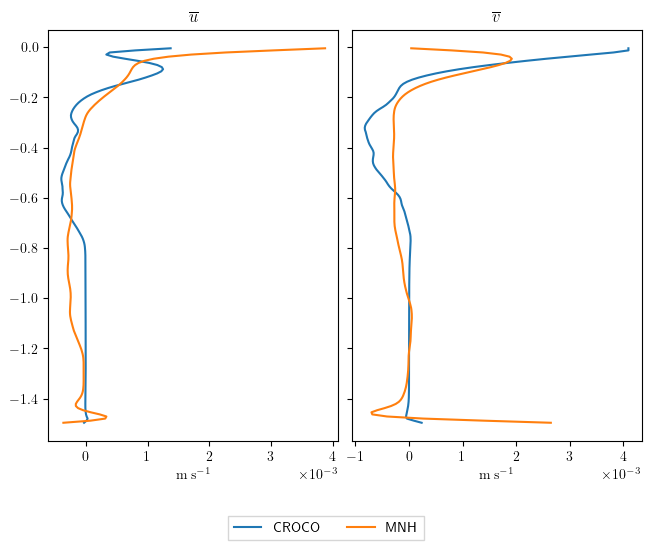

In [24]:
plot_mean_velocities()

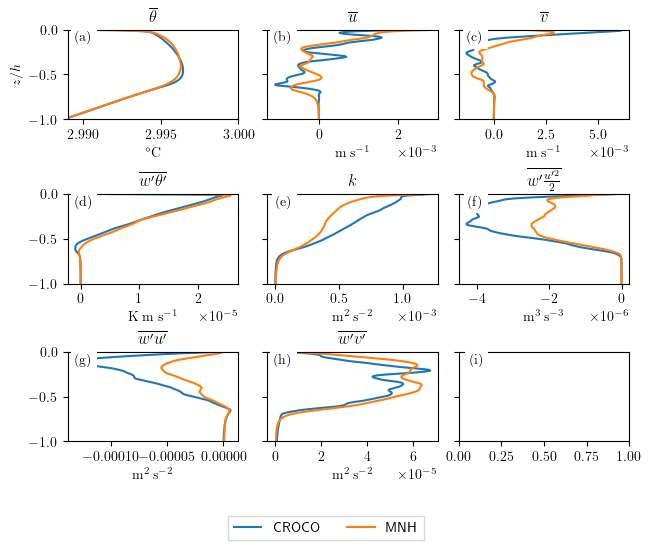

In [36]:
plot_instant_panel(instant=instant-30)

In [8]:
lat0=60
omega          = 7.292116e-05; rad            = np.pi/180.
fcor      = 2.*omega*np.sin(rad*lat0)

In [9]:
fcor**2

1.5952486727236802e-08

In [10]:
scm.close()

NameError: name 'scm' is not defined

In [ ]:
zinv=3500
B0=7.302579717857959e-08
Ro = (B0/fcor)**(1/2)/(fcor*zinv)
cff= np.tanh(Ro**(1/2)); 1/cff

4.365172944882787

In [ ]:
(0.02/0.0045)

4.444444444444445

In [ ]:
LG_SBG['SBG_WTHL']

<xarray.Dataset>
Dimensions:   (time_les: 276, level_les: 180, nsv: 1)
Dimensions without coordinates: time_les, level_les, nsv
Data variables: (12/25)
    SBG_TKE   (time_les, level_les) float64 ...
    SBG_U2    (time_les, level_les) float64 ...
    SBG_V2    (time_les, level_les) float64 ...
    SBG_W2    (time_les, level_les) float64 ...
    SBG_UV    (time_les, level_les) float64 ...
    SBG_WU    (time_les, level_les) float64 ...
    ...        ...
    SBG_WSV   (nsv, time_les, level_les) float64 ...
    SBG_UTKE  (time_les, level_les) float64 ...
    SBG_VTKE  (time_les, level_les) float64 ...
    SBG_WTKE  (time_les, level_les) float64 ...
    SBG_W2TL  (time_les, level_les) float64 ...
    SBG_WTL2  (time_les, level_les) float64 ...
Attributes:
    levels:   mask
    mask:     cart

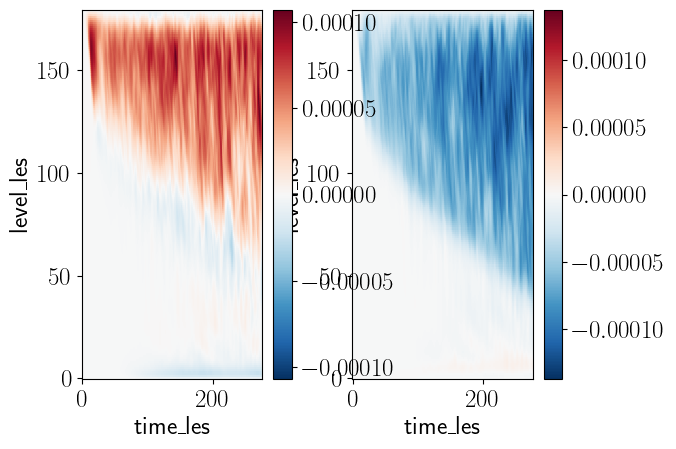

In [ ]:
fig,axs = plt.subplots(ncols=2,nrows=1)

i=-1
###########
i+=1; ax=axs.flat[i]
(-WU).plot(y='level_les',ax=ax)
i+=1; ax=axs.flat[i]
(-WV).plot(y='level_les',ax=ax)
# i+=1; ax=axs.flat[i]
# scm['WU'].plot(y='z_w')
# i+=1; ax=axs.flat[i]
# scm['WV'].plot(y='z_w')

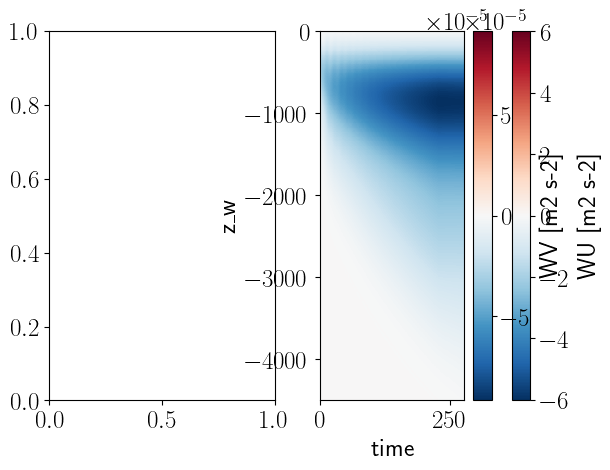

In [ ]:
fig,axs = plt.subplots(ncols=2,nrows=1)

i=-1
###########
# i+=1; ax=axs.flat[i]
# (-WU).plot(y='level_les',ax=ax)
# i+=1; ax=axs.flat[i]
# (-WV).plot(y='level_les',ax=ax)
i+=1; ax=axs.flat[i]
scm['WU'].plot(y='z_w')
i+=1; ax=axs.flat[i]
scm['WV'].plot(y='z_w')

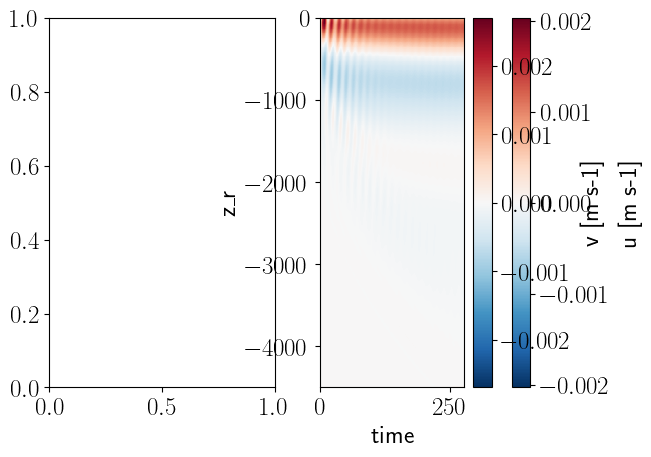

In [ ]:
fig,axs = plt.subplots(ncols=2,nrows=1)

i=-1
###########
# i+=1; ax=axs.flat[i]
# (-WU).plot(y='level_les',ax=ax)
# i+=1; ax=axs.flat[i]
# (-WV).plot(y='level_les',ax=ax)
i+=1; ax=axs.flat[i]
scm['u'].plot(y='z_r')
i+=1; ax=axs.flat[i]
scm['v'].plot(y='z_r')

In [ ]:

#===========================================================================
#case = 'FC500'
case = 'W05_C500'


saving_path = '../../figures/SCM_LES_comparison/'
saving_name = case+'72h_profile_LES_vs_EDMF.png'


#loading LES output once before using the function
file = 'GN_01.1.OC_01.000.nc'
path = '../data/'+case+'/'
les = xr.open_dataset(path+file)
LG_MEAN = xr.open_dataset(path+file,group ='/LES_budgets/Mean/Cartesian/Not_time_averaged/Not_normalized/cart')
TH_les = (LG_MEAN.MEAN_TH - 273.15)
U_les = (LG_MEAN.MEAN_U)
V_les = (LG_MEAN.MEAN_V)

LG_RES = xr.open_dataset(path+file,group ='/LES_budgets/Resolved/Cartesian/Not_time_averaged/Not_normalized/cart')
LG_SBG = xr.open_dataset(path+file,group ='/LES_budgets/Subgrid/Cartesian/Not_time_averaged/Not_normalized/cart')
WTH = (LG_RES.RES_WTH + LG_SBG.SBG_WTHL)
WU = (LG_RES.RES_WU + LG_SBG.SBG_WU)
WV = (LG_RES.RES_WV + LG_SBG.SBG_WV)
TKE = (LG_RES.RES_KE + LG_SBG.SBG_TKE)
WTKE = (LG_RES.RES_WKE + LG_SBG.SBG_WTKE)

BU_KE = xr.open_dataset(path+file,group ='/LES_budgets/BU_KE/Cartesian/Not_time_averaged/Not_normalized/cart')

instant=-1
Z = les.level_les - les['level_w'][-1]

mld = Z[(-WTH[instant]).argmax()]

zlim = mld - 50
zadim = Z/(-mld)

### Computing terms of the budget

TEND = (BU_KE['RES_TEND']+BU_KE['SBG_TEND'])
TR   = (BU_KE['RES_PRES']+BU_KE['RES_TR'] + BU_KE['SBG_TR']+BU_KE['RES_SBGT']+BU_KE['SBG_ADVR']+BU_KE['SBG_DP_R']) 
WB   = (BU_KE['RES_TP'] + BU_KE['SBG_TP'])
P    = (BU_KE['RES_DP'] + BU_KE['SBG_DP_M'])
EPS  = (BU_KE['SBG_DISS'] + BU_KE['RES_NUMD'] )
RESI = (BU_KE['RES_RESI'] + BU_KE['SBG_RESI'])

TRANSFER = (BU_KE['RES_SBGT']+BU_KE['SBG_ADVR']+BU_KE['SBG_DP_R'])

In [ ]:
condsamp = xr.open_dataset('../data/WANG1_FR/WANG1_FR_object_diags_Cw_m1_276h.nc')
# condsamp = xr.open_dataset('../data/FC500/WANG1_FR_object_diags_Cw_m1_276h.nc')

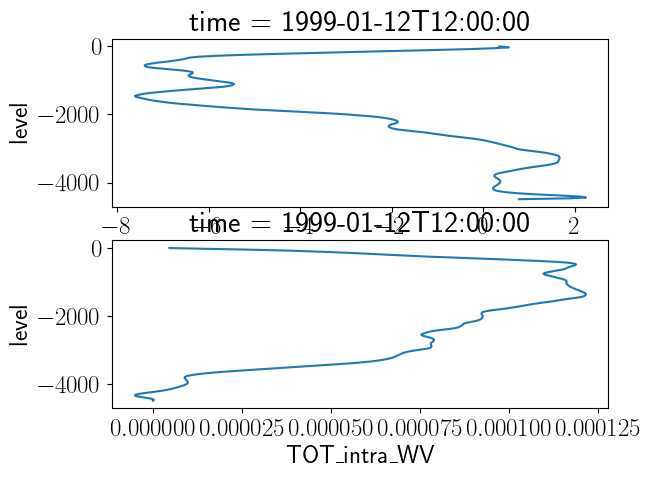

In [ ]:
fig, axs = plt.subplots(nrows=2)
(condsamp['TOT_intra_WU'] ).plot(y='level',ax=axs.flat[0])
(condsamp['TOT_intra_WV'] ).plot(y='level',ax=axs.flat[1]) 